In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# User defined Standardization function for basic DataFrame
- User Defined function that takes a DataFrame as input 
- Output is database that has been standardized
- Mean of output DataFrame is pulled to 0
- Standard Deviation of the output DataFrame will be 1

In [4]:
# User defined function for standardization of the dataframe inputed
def standardization(df):
    y = {}
    for i in df:
        x = []
        means = df[i].mean()
        stds = df[i].std()
        x = [(j-means)/stds for j in df[i]]
        y[i]=x
    return pd.DataFrame(y)

In [18]:
df = pd.DataFrame({'a':np.random.exponential(5,10000),'b':np.random.uniform(10,100,10000)})
df.describe()

,a,b
count,10000.000000,10000.000000
mean,4.985912,54.975479
std,4.970218,26.115246
min,0.000169,10.001247
25%,1.399664,32.127374
50%,3.403090,55.027100
75%,6.930714,77.933579
max,51.317725,99.997533


In [ ]:
# Plotting Before Standardization

In [21]:
df_standard = standardization(df)

In [22]:
# After Standardization
df_standard.describe()

,a,b
count,1.000000e+04,1.000000e+04
mean,2.027079e-15,-9.480194e-16
std,1.000000e+00,1.000000e+00
min,-1.003124e+00,-1.722145e+00
25%,-7.215473e-01,-8.748953e-01
50%,-3.184612e-01,1.976663e-03
75%,3.912911e-01,8.791072e-01
max,9.321888e+00,1.723976e+00


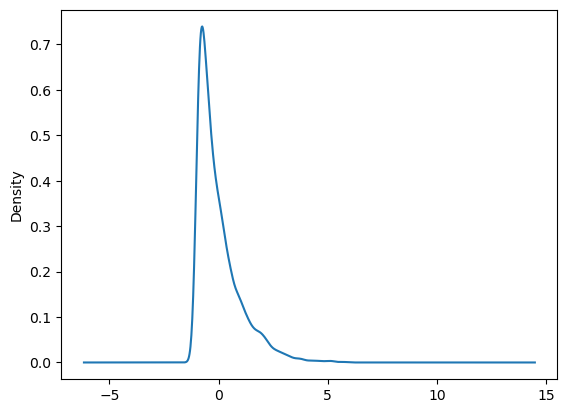

In [23]:
# Plotting before Standardization
df_standard.iloc[1:,0].plot(kind='kde')
plt.show()

In [ ]:
# When we want this function to check for only continous columns and transform those columns only

In [52]:
# Let us consider 'titanic' dataset which has continous and categorical columns from seaborn module
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [53]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [29]:
# Only selecting continous columns
titanic.select_dtypes(['float64','int64'])

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [37]:
# Only selecting categorical columns
titanic.select_dtypes(['object','category','bool'])

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,S,Third,man,True,NaN,Southampton,no,False
1,female,C,First,woman,False,C,Cherbourg,yes,False
2,female,S,Third,woman,False,NaN,Southampton,yes,True
3,female,S,First,woman,False,C,Southampton,yes,False
4,male,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...
886,male,S,Second,man,True,NaN,Southampton,no,True
887,female,S,First,woman,False,B,Southampton,yes,True
888,female,S,Third,woman,False,NaN,Southampton,no,False
889,male,C,First,man,True,C,Cherbourg,yes,True


In [62]:
def standardization_continous(df):
    y = {}
    for i in df.select_dtypes(['float64','int64']):
        x = []
        means = df[i].mean()
        stds = df[i].std()
        x = [(j-means)/stds for j in df[i]]
        y[i]=x
    return pd.concat([pd.DataFrame(y),df.select_dtypes(['object','category','bool'])],axis = 1)

In [63]:
titanic_standard = standardization_continous(titanic)
titanic_standard

,survived,pclass,age,sibsp,parch,fare,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,-0.788829,0.826913,-0.530005,0.432550,-0.473408,-0.502163,male,S,Third,man,True,NaN,Southampton,no,False
1,1.266279,-1.565228,0.571430,0.432550,-0.473408,0.786404,female,C,First,woman,False,C,Cherbourg,yes,False
2,1.266279,0.826913,-0.254646,-0.474279,-0.473408,-0.488580,female,S,Third,woman,False,NaN,Southampton,yes,True
3,1.266279,-1.565228,0.364911,0.432550,-0.473408,0.420494,female,S,First,woman,False,C,Southampton,yes,False
4,-0.788829,0.826913,0.364911,-0.474279,-0.473408,-0.486064,male,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.788829,-0.369158,-0.185807,-0.474279,-0.473408,-0.386454,male,S,Second,man,True,NaN,Southampton,no,True
887,1.266279,-1.565228,-0.736524,-0.474279,-0.473408,-0.044356,female,S,First,woman,False,B,Southampton,yes,True
888,-0.788829,0.826913,NaN,0.432550,2.007806,-0.176164,female,S,Third,woman,False,NaN,Southampton,no,False
889,1.266279,-1.565228,-0.254646,-0.474279,-0.473408,-0.044356,male,C,First,man,True,C,Cherbourg,yes,True


# Inference:
- The mean of the output DataFrame is 0 and std is 1
- Standardization of Continous columns Feature Scaling is complete
- Categorical columns are unaltered

# User defined Normalization function simillar to Min-Max Scalar
- User Defined function that takes a DataFrame as input 
- Output is database that has been Normalized for continous columns
- Categorial columns in the database are unchanged
- Resultant continous Data points will range between [0,1]

In [73]:
# Normalization function imitating Min-Max scalar
def normalization_MinMaxScalar(df):
    y = {}
    for i in df.select_dtypes(['float64','int64']):
        y[i]= (df[i]-df[i].min())/(df[i].max()-df[i].min())
    return pd.concat([pd.DataFrame(y),df.select_dtypes(['object','category','bool'])],axis = 1)

In [76]:
titanic_MinMax = normalization_MinMaxScalar(titanic)
titanic_MinMax

,survived,pclass,age,sibsp,parch,fare,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0.0,1.0,0.271174,0.125,0.000000,0.014151,male,S,Third,man,True,NaN,Southampton,no,False
1,1.0,0.0,0.472229,0.125,0.000000,0.139136,female,C,First,woman,False,C,Cherbourg,yes,False
2,1.0,1.0,0.321438,0.000,0.000000,0.015469,female,S,Third,woman,False,NaN,Southampton,yes,True
3,1.0,0.0,0.434531,0.125,0.000000,0.103644,female,S,First,woman,False,C,Southampton,yes,False
4,0.0,1.0,0.434531,0.000,0.000000,0.015713,male,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.334004,0.000,0.000000,0.025374,male,S,Second,man,True,NaN,Southampton,no,True
887,1.0,0.0,0.233476,0.000,0.000000,0.058556,female,S,First,woman,False,B,Southampton,yes,True
888,0.0,1.0,NaN,0.125,0.333333,0.045771,female,S,Third,woman,False,NaN,Southampton,no,False
889,1.0,0.0,0.321438,0.000,0.000000,0.058556,male,C,First,man,True,C,Cherbourg,yes,True


In [77]:
titanic_MinMax.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,0.654321,0.367921,0.065376,0.063599,0.062858
std,0.486592,0.418036,0.182540,0.137843,0.134343,0.096995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.247612,0.000000,0.000000,0.015440
50%,0.000000,1.000000,0.346569,0.000000,0.000000,0.028213
75%,1.000000,1.000000,0.472229,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# User defined Normalization function simillar to Mean Normalization
- User Defined function that takes a DataFrame as input 
- Output is database that has been Normalized for continous columns
- Categorial columns in the database are unchanged
- Resultant Data points will range between [-1,1]

In [85]:
# Normalization function imitating Mean Normalization
def mean_Normalization(df):
    y = {}
    for i in df.select_dtypes(['float64','int64']):
        y[i]= (df[i]-df[i].mean())/(df[i].max()-df[i].min())
    return pd.concat([pd.DataFrame(y),df.select_dtypes(['object','category','bool'])],axis = 1)

In [86]:
titanic_MeanNorm = mean_Normalization(titanic)
titanic_MeanNorm

,survived,pclass,age,sibsp,parch,fare,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,-0.383838,0.345679,-0.096747,0.059624,-0.063599,-0.048707,male,S,Third,man,True,NaN,Southampton,no,False
1,0.616162,-0.654321,0.104309,0.059624,-0.063599,0.076277,female,C,First,woman,False,C,Cherbourg,yes,False
2,0.616162,0.345679,-0.046483,-0.065376,-0.063599,-0.047390,female,S,Third,woman,False,NaN,Southampton,yes,True
3,0.616162,-0.654321,0.066611,0.059624,-0.063599,0.040786,female,S,First,woman,False,C,Southampton,yes,False
4,-0.383838,0.345679,0.066611,-0.065376,-0.063599,-0.047146,male,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.383838,-0.154321,-0.033917,-0.065376,-0.063599,-0.037484,male,S,Second,man,True,NaN,Southampton,no,True
887,0.616162,-0.654321,-0.134445,-0.065376,-0.063599,-0.004302,female,S,First,woman,False,B,Southampton,yes,True
888,-0.383838,0.345679,NaN,0.059624,0.269734,-0.017087,female,S,Third,woman,False,NaN,Southampton,no,False
889,0.616162,-0.654321,-0.046483,-0.065376,-0.063599,-0.004302,male,C,First,man,True,C,Cherbourg,yes,True


# User defined Normalization function simillar to Max Absolute Normalization
- User Defined function that takes a DataFrame as input 
- Output is database that has been Normalized for continous columns
- Categorial columns in the database are unchanged
- Resultant Data points will range between [0,1]

In [88]:
# Normalization function imitating Max Absolute Normalization
def max_Abs_Normalization(df):
    y = {}
    for i in df.select_dtypes(['float64','int64']):
        y[i]= (df[i])/abs(df[i].max())
    return pd.concat([pd.DataFrame(y),df.select_dtypes(['object','category','bool'])],axis = 1)

In [94]:
titanic_MaxAbsNorm = max_Abs_Normalization(titanic)
titanic_MaxAbsNorm

,survived,pclass,age,sibsp,parch,fare,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0.0,1.000000,0.2750,0.125,0.000000,0.014151,male,S,Third,man,True,NaN,Southampton,no,False
1,1.0,0.333333,0.4750,0.125,0.000000,0.139136,female,C,First,woman,False,C,Cherbourg,yes,False
2,1.0,1.000000,0.3250,0.000,0.000000,0.015469,female,S,Third,woman,False,NaN,Southampton,yes,True
3,1.0,0.333333,0.4375,0.125,0.000000,0.103644,female,S,First,woman,False,C,Southampton,yes,False
4,0.0,1.000000,0.4375,0.000,0.000000,0.015713,male,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.666667,0.3375,0.000,0.000000,0.025374,male,S,Second,man,True,NaN,Southampton,no,True
887,1.0,0.333333,0.2375,0.000,0.000000,0.058556,female,S,First,woman,False,B,Southampton,yes,True
888,0.0,1.000000,NaN,0.125,0.333333,0.045771,female,S,Third,woman,False,NaN,Southampton,no,False
889,1.0,0.333333,0.3250,0.000,0.000000,0.058556,male,C,First,man,True,C,Cherbourg,yes,True


In [95]:
titanic_MaxAbsNorm.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.0
pclass,891.0,0.769547,0.278690,0.333333,0.666667,1.000000,1.000000,1.0
age,714.0,0.371239,0.181581,0.005250,0.251563,0.350000,0.475000,1.0
sibsp,891.0,0.065376,0.137843,0.000000,0.000000,0.000000,0.125000,1.0
parch,891.0,0.063599,0.134343,0.000000,0.000000,0.000000,0.000000,1.0
fare,891.0,0.062858,0.096995,0.000000,0.015440,0.028213,0.060508,1.0


# Outlier Impact analysis on Standardization and Normalization techniques

Text(0.5, 1.0, 'Max_Abs_Normalized Titanic')

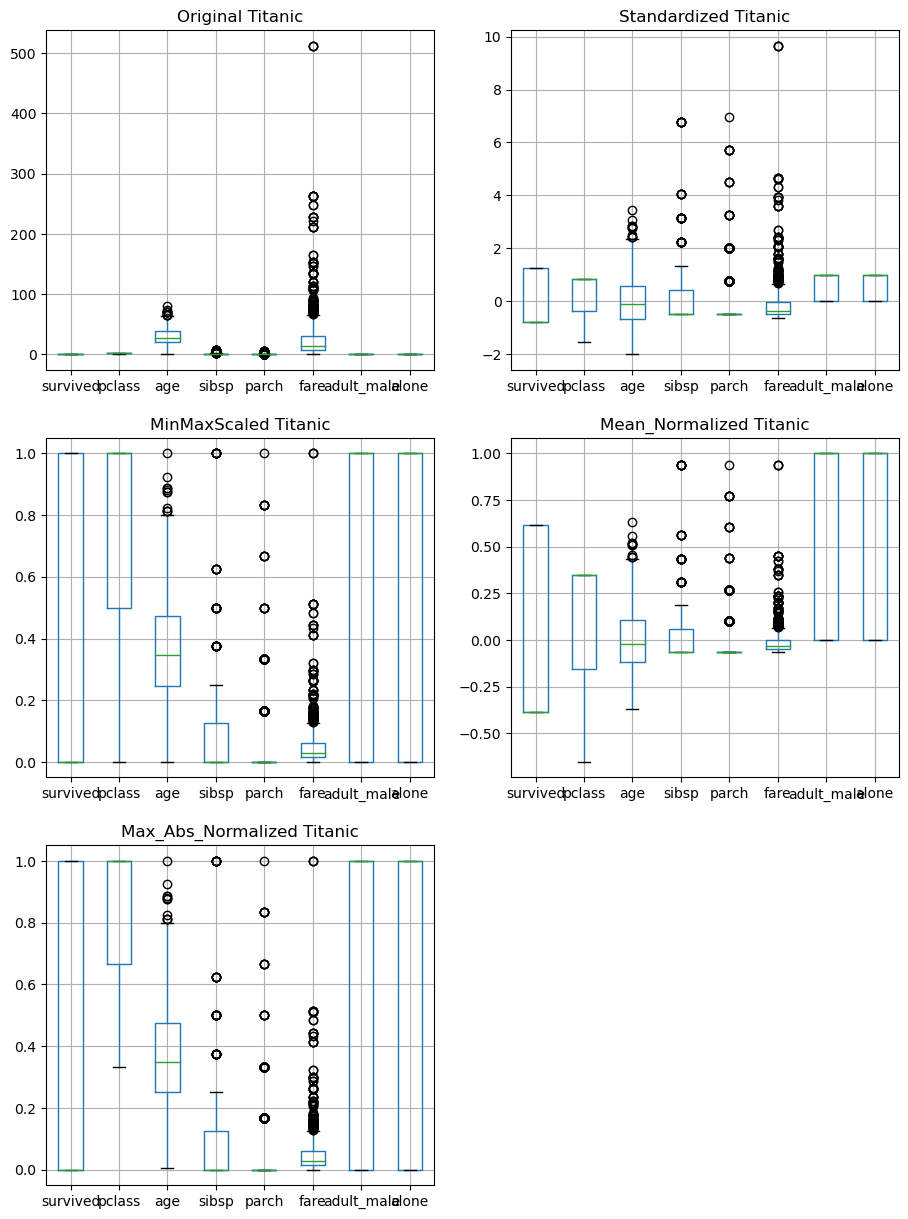

In [111]:
plt.figure(figsize = (11,15))
plt.subplot(3, 2, 1)
titanic.boxplot()
plt.title("Original Titanic")
plt.subplot(3, 2, 2)
titanic_standard.boxplot()
plt.title("Standardized Titanic")
plt.subplot(3, 2, 3)
titanic_MinMax.boxplot()
plt.title("MinMaxScaled Titanic")
plt.subplot(3, 2, 4)
titanic_MeanNorm.boxplot()
plt.title("Mean_Normalized Titanic")
plt.subplot(3, 2, 5)
titanic_MaxAbsNorm.boxplot()
plt.title("Max_Abs_Normalized Titanic")
